# 20220624

#### CHAPTER 2 : 퍼셉트론


- 퍼셉트론이란?
  - 다수의 신호를 입력으로 받아 하나의 신호를 출력
  - 퍼셉트론 신호는 흐른다/안 흐른다의 두 가지 값을 가질 수 있다.
  - 입력 신호가 뉴런에 보내질 때는 각각 `고유한` 가중치가 곱해진다.
  - 뉴런에서 보내온 신호의 `총합`이 정해진 한계를 넘어설 때만 1을 출력한다.
    - 이를 `'뉴런이 활성화한다'`라고 표현한다. 이때 그 한계를 임계값이라 하며 대개 $\theta$로 표현한다.
  - 퍼셉트론은 `복수의 입력 신호 각각`에 `고유한 가중치를 부여`한다.
  - `가중치`는 각 신호가 `결과에 주는 영향력을 조절`하는 요소로 적용
    - 즉 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻함.
    - 퍼셉트론의 가중치는 그 값이 클수록 강한 신호를 흘려보낸다.

- 단순한 논리 회로
  - AND 게이트
    - 입력이 둘이고 출력은 하나이다.(참고 : 입력 신호와 출력 신호의 대응 표를 `진리표`라 한다)
    - 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력한다.
  - NAND 게이트와 OR 게이트
    - NAND 게이트 : AND 게이트의 출력을 뒤집은 것
    - 두 입력이 모두 1일 때만 0을 출력하고 그 외에는 1을 출력한다.
    - 이때 매개변수의 조합은 AND 게이트를 구현하는 매개변수의 부호를 모두 반전하기만 하면 NAND 게이트가 된다.
    - OR 게이트 : 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로이다.

---

#### 퍼셉트론의 구조는 AND, NAND, OR 게이트 모두에서 똑같다. 
#### 세 가지 게이트에서 다른 것은 매개변수(가중치와 임계값)의 값 뿐이다.
#### 즉, 똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정하여 AND, NAND, OR로 사용할 수 있게 된다.

> 퍼셉트론의 매개변수 값을 정하는 것은 컴퓨터가 아니라 인간이다. 인간이 직접 진리표라는 학습 데이터를 보면서 매개변수의 값을 생각한다. 기계학습 문제는 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 한다. 학습이란 적절한 매개변수 값을 정하는 작업이며, 사람은 퍼셉트론의 구조를 고민하고 컴퓨터에 학습할 데이터를 주는 일을 한다. 

---

- 퍼셉트론 구현해보자

In [1]:
def AND(x1, x2):
    # 매개변수(가중치와 임계값)는 함수 안에서 초기화한다.
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    
    # 이때, 부등식에 등호가 어디에 들어가 있는지 중요!!!
    
    if tmp <= theta:
        return 0
    elif tmp> theta:
        return 1

In [2]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


- 위 AND 게이트를 좀 더 효율적인 방식으로 수정해보자
- 함수 AND에서 tmp <= theta에서 theta를 좌항으로 옮겨서 정리한다.
- 즉, b + x1*w1 + x2*w2 <= 0 이 되고
- 이때, b를 편향이라고 바꿔부른다. 
  - 원래 b는 임계값! (=theta)

> 즉, 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여 그 값이 0을 초과하면 1을 출력하고, 그렇지 않으면 0을 출력한다. 

-  넘파이를 이용하여 가중치와 편향 개념 구현해보자

In [3]:
import numpy as np
x = np.array([0,1]) # 두 입력 값
w = np.array([0.5,0.5]) # 가중치
b = -0.7 # 편향
# 원래 우항에 있던 임계값을 좌항으로 옮겼기 때문에 마이너스! 그런데 이건 게이트마다 임계값이 다르기 때문에 좌항으로 옮겼을 때
# 음수일 수도 있고 양수일 수도 있음
np.sum(w*x)

0.5

In [4]:
np.sum(w*x) + b

-0.19999999999999996

- 가중치와 편향을 도입한 AND 게이트를 구현해보자

In [5]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0 
    else :
        return 1

> 가중치는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수고, 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력) 하느냐를 조정하는 매개변수이다. (책에 따라 셋 모두(가중치와 편향)를 가중치라고 할 때도 있다)

- NAND 게이트와 OR 게이트 구현

In [6]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0
    else : 
        return 1

def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0
    else : 
        return 1

- AND, NAND, OR 게이트 `모두 같은 구조`의 퍼셉트론이며, 차이는 가중치 매개변수의 값 뿐이다.

---

- 퍼셉트론의 한계
  - 무슨 한계?
    - 직선 하나로 나눈 영역만 표현할 수 있다는 한계
- XOR 게이트 (배타적 논리합)
  - 한쪽이 1일 때만 1을 출력
  - 지금까지 본 퍼셉트론으로는 XOR 게이트를 구현할 수 없다.
    - 왜?
      - XOR 게이트는 한 쪽이 1일 때만 1을 출력한다고 했다.
      - 이 입력값들을 좌표평면에 나타내면 입력 값들을 하나의 직선으로 분리하는 것은 불가능하다. 
      - 따라서 기존의 AND, NAND, OR 게이트의 퍼셉트론으로는 XOR 게이트를 구현할 수 없다. 
      - 책 55p ~ 56p 참고

- 이때, 직선이라는 제약을 없앤다면 주어진 입력값들을 두 구간으로 분류할 수 있을 것이다. 
- 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다. 
  - 그렇다면 방법은?
  - 층을 쌓아, 다층 퍼셉트론을 만든다.
  - 층을 하나 더 쌓아 XOR를 표현해보자

---

> 0627~

- 기존 게이트 조합하기
  - AND, NAND, OR 게이트를 조합하기
    - 퍼셉트론의 한계 : 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없음
    - 즉, 단층 퍼셉트론으로는 비선형 영역을 분리할 수 없음
    - 따라서 퍼셉트론을 조합하여, 즉 층을 쌓아서 XOR 게이트를 구현하면 됨
  - 이때 XOR 게이트는 입력 중 하나만 1일 때, 출력 1이 가능

In [7]:
# 지금까지 정의한 함수 AND, NAND, OR를 사용하면 XOR 게이트를 쉽게 구현할 수 있음
def XOR(x1,x2) : 
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    
    return y

In [8]:
print(XOR(0,0))
print(XOR(0,1)) # 이때 1을 출력해야 함
print(XOR(1,0)) # # 이때 1을 출력해야 함
print(XOR(1,1))

0
1
1
0


- 단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현할 수 있게 됨

> 정리

    1. 퍼셉트론에서는 가중치와 편향을 매개변수로 설정
    2. XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다
    3. 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다
    4. 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다
    5. 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다

----

----

----

### 신경망

#### - 퍼셉트론에서 신경망으로
- 신경망은 퍼셉트론과 유사한 점이 많으나, 퍼셉트론과 다른 점을 중심으로 신경망의 구조를 설명해보자
- 신경망은 입력층, 은닉층, 출력층으로 구성되어 있음
  - 이때 은닉층의 뉴런은 입력층이나 출력층과 달리 사람 눈에 보이지 않음
    - (아마 이게 블랙박스라고 일컬었던 것 같음)
  - rewiew
    - 편향 : 뉴런이 얼마나 쉽게 활성화되느냐를 제어
    - 가중치 : 각 신호의 영향력을 제어

- 활성화 함수의 등장
  - 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수라 한다.
  - 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

- 종전에 설명한 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수라 한다.
  - 그래서 '퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다'고 할 수 있다.
  - 즉, 활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 채용한 것
    - 그 외, 시그모이드 함수도 활성화 함수로 사용할 수 있음

- 활성화 함수 中 시그모이드 함수

$$h(x) = {\frac{1}{1+exp(-x)}}$$

- 활성화 함수로 이용되는 시그모이드 함수를 계단 함수와 비교하면서 자세히 살펴보자

In [9]:
def step_function(x):
    if x>0:
        return 1
    else :
        return 0 

- 해당 함수는 실수만 받아들임
  - 즉, 넘파이 배열을 인수로 넣을 순 없음
    - 이를테면, np.array([1.3,23.3])
    - 가능하게 해보자

In [10]:
def step_function(x):
    y = x>0
    return y.astype(np.int) # 원하는 자료형(e.g. np.int)을 인수로 지정해주면 된다

In [11]:
step_function(np.array([23.123,-213,123,333.2,0]))

/var/folders/qj/_b9p7msx2x5d5j728xn99ps80000gn/T/ipykernel_4375/1740302745.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int) # 원하는 자료형(e.g. np.int)을 인수로 지정해주면 된다


array([1, 0, 1, 1, 0])

---

---

---

> 0628

- 계단 함수의 그래프

/var/folders/qj/_b9p7msx2x5d5j728xn99ps80000gn/T/ipykernel_4375/2993925797.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype = np.int) # 배열 생성하면서 동시에 자료형까지 지정


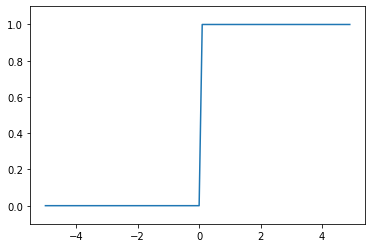

In [12]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype = np.int) # 배열 생성하면서 동시에 자료형까지 지정

x = np.arange(-5,5,0.1) # -5부터 5까지 0.1의 간격으로 수열 생성
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

- 시그모이드 함수 구현하기

In [13]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [14]:
x = np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

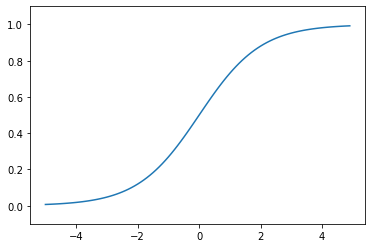

In [15]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

**S자모양**

- 시그모이드 함수와 계단 함수 비교

시그모이드는 부드러운 곡선이며 입력에 딸 출력이 연속적으로 변화한다.

한편 계단 함수는 0을 경계로 출력이 갑자기 바뀌어 버린다. 

이때 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다. 

계단 함수가 0과 1 중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려준다. 

다시말해, 퍼셉트론에서는 뉴런 사이에 0혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.(신경망과 퍼셉트론은 유사하나 상이한 부분도 분명 있음. 다른 개념이다.)

비유하자면, 시그모이드 함수는 물레방아처럼 흘러온 물의 양에 비례해 흐르는 물의 양을 조절한다.

- 시그모이드 함수와 계단 함수의 공통점?
  - 큰 관점에서 보면 둘은 같은 모양을 하고 있다. 
  - 둘 다 입력이 작을 때의 출력은 0에 가깝거나 0이고, 입력이 커지면 출력이 1에 가까워지는 혹은 1이 되는 구조이다. 
  - 즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.
    - 중요도?
  - 그리고 입력이 아무리 작거나 커도 출력은 0에서 1 사이라는 것도 둘의 공통점이다. 
  - 또한 두 함수 모두 ### 비선형 함수이다.

- 비선형 함수?
  - 직선 1개로는 그릴 수 없는 함수
  - 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다
    - 즉, 선형 함수는 사용해선 안 된다.
    - 왜? 선형 함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 
    - 선형 함수의 문제? 
      - 층을 아무리 깊게 해도 은닉층이 없는 네트워크(즉, 입력층과 출력층만 있는??)로도 똑같은 기능을 할 수 있다는 데 있다.
      - 이 부분 먼저 설명해보자
      - 선형 함수인 h(x) = cx를 활성화 함수로 사용한 3층 네트워크를 떠올려보라
      - 이를 식으로 나타내면 y(x) = h(h(h(x)))가 되면 계산은 c*c*c*x지만, 결국은 특정 상수 곱하기 엑스가 되는 것
      - 즉, y(x) = h(h(h(x))) = ax로도 표현가능하다는 것.
        - 은닉층이 없는 네트워크로도 표현이 가능해진 것이다. 

> 즉! 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없다. 

> 왜? 선형 함수로 여러 층을 구성해봤자 그냥 은닉층 없는 네트워크로도 동일 기능을 수행할 수 있기 때문에

#### 따라서 층을 쌓는 혜택을 얻기 위해선 활성화 함수를 비선형 함수로 채택해야 한다.

---

- ReLU 함수
  - 입력이 0을 넘으면 그 입력을 그대로 출력, 그렇지 않으면 무조건 0을 출력

In [16]:
def relu(x):
    return np.maximum(0,x)

- 넘파이 행렬을 써서 신경망을 구현해보자 
- 해당 예에서는 편향과 활성화 함수를 생략하고 가중치만 갖는 신경망을 구현한 것이다.

In [17]:
X = np.array([1,2]) # 입력값
W = np.array([[1,3,5],[2,4,6]]) # 가중치.
# 해당 예에서는 편향과 활성화 함수를 생략하고 가중치만 갖는 신경망을 구현한다고 했음
# 이때, 가중치는 2x3 크기의 matrix이다
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


> 주의 : Y = np.dot(X,W)에서 입력값과 각각 대응되는 가중치들이 적절히 곱해지도록 행렬곱이 이루어짐

> 이를테면 X가 1x2 크기의 행렬이고 W가 2x3 크기의 행렬인데 W에 원소들을 각각 어떻게 배치하느냐에 따라 입력값에 곱해져야 하는 가중치들이 적절히 곱해질 수도 안 곱해질 수도 있음 

> 따라서 행렬곱을 수행해줄 때 입력값 각각에 할당된 가중치들이 입력값과 적절히 곱해질 수 있도록 가중치 행렬을 구성해주어야 함

위 예에서 볼 수 있듯 행렬의 곱으로 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요함을 알 수 있다. 

---

- 3층 신경망에서 수행되는 입력부터 출력까지의 처리(순방향 처리)를 구현해보자
- 넘파이 배열을 잘 구사하면 아주 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다. 

- 85p 그림 3-17을 확인해보면, 편향을 0층 뉴런에 따로 할당하여 처리해줄 수 있다.
- 해당 예에서는 편향을 1로 설정하여 두 입력값과 가중치가 곱해진 결과의 합과 편향을 더하여 다음 뉴런에 전달해주었음

In [18]:
X = np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape) # 1x2 
print(W1.shape) # 2x3
print(B1.shape) # 1x3

A1 = np.dot(X,W1) + B1
print(A1) # 1x3
print(A1.shape)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
(3,)


- 0층이 아닌 1층에서의 활성화 함수를 시그모이드로 설정해보고 코드를 구현해보자

In [19]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


- 1층에서 2층으로 가는 과정을 구현해보자

In [20]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


- 해당 과정은 1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하면 0층에서 1층으로의 구현과 대동소이하다.
- 이처럼 넘파이 배열을 사용하면 층 사이의 신호 전달을 쉽게 구현할 수 있다. 

- 이제 2층에서 3층으로 즉, 2층에서 출력층으로의 신호 전달을 살펴보자
- 출력층의 구현도 그 동안의 구현과 일맥상통하나 활성화 함수만 지금까지의 은닉층과 다르다

In [21]:
def identity_function(x):
    return x

# 여기서는 활성화함수로서 항등함수를 설정한 것


W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # 혹은 Y = A3 , 활성화 함수로 항등함수를 설정했기 때문에

> 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 설정한다

> 이를테면, 회귀에는 항등함수를 설정하며 이진 분류에는 시그모이드 함수를 설정하고 다중분류에는 소프트맥스 함수를 사용하는 것이 일반적이다

> 해당 예에서는 회귀에서 항등함수를 설정하는 경우를 상정하고 출력층의 활성화함수를 설정해준 것이다. 

### 구현 정리

In [22]:
def init_network():
    network = {} # 빈 dict 설정
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

# 해당 함수를 실행시키면 3층짜리 신경망에서 필요한 가중치와 편향을 불러올 수 있음

# forward 함수를 실행시키기 위해서는 당연히 network가 설정되어 있어야 하고 network가 설정되기 위해서는 init_network함수가 불러와져야 함
def forward(network,x) : 
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1) # 입력층(0층)에서 1층으로 가며 얻은 출력값
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1,0.5]) # 0층에서의 입력값
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


> 이때 함수 이름을 forward라고 명해준 이유는 신호가 순방향(입력에서 출력 방향)으로 전달됨(순전파)을 알리기 위함

> 순전파가 있다는 것은 역전파도 있다는 의미

### 출력층 설계하기
- 신경망을 분류와 회귀 모두에 이용할 수 있다. 
- 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
- 일반적으로 회귀에는 항등 함수를, 분류에는 소프트 맥스 함수를 사용한다.

> ### 항등 함수와 소프트 맥스 함수 구현하기

분류에서 사용하는 소프트 맥스의 식을 알아보자

$$y_k = \frac{exp(a_k)}{\Sigma exp(a_i)}$$

- 92p의 그림에서 볼 수 있듯, 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받는다. 소프트맥스 식의 분모에서 볼 수 있듯 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다.

---

> 0704~

- 소프트맥스 함수를 구현해보자

In [23]:
a = np.array([0.3,2.9,4])

exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)

y = exp_a/sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [24]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

- 소프트 맥스함수를 컴퓨터로 계산할 때는 결함이 있다.
### 바로 오버플로 문제이다

- 지수함수는 매우 큰 수까지 다루게 되는데 이런 큰 값끼리 나눗셈을 하게 되면 결과 수치가 불안정해진다
- 이 문제를 해결하도록 소프트 맥스 함수를 구현 개선해보자
- 자세한 식은 93p를 참고한다

> 오버플로 문제를 해결할 구체적인 예를 하나 살펴보자

In [25]:
a = np.array([1010,1000,990])
np.exp(a)/ np.sum(np.exp(a))


/var/folders/qj/_b9p7msx2x5d5j728xn99ps80000gn/T/ipykernel_4375/4152157764.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a)/ np.sum(np.exp(a))
/var/folders/qj/_b9p7msx2x5d5j728xn99ps80000gn/T/ipykernel_4375/4152157764.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a)/ np.sum(np.exp(a))


array([nan, nan, nan])

- 값이 너무 커 제대로 계산되지 않는다.

In [26]:
c = np.max(a)
a-c

array([  0, -10, -20])

> 이렇게 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다. 

In [27]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

> 이렇게 입력 신호 중 최댓값을 빼주면 올바르게 계산할 수 있다.

> 이를 바탕으로 소프트맥스 함수를 다시 구현해보자

In [28]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

- 소프트맥스 함수의 특징

In [29]:
a = np.array([0.3,2.9,4])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [30]:
np.sum(y)

1.0

> ### `특징 : 소프트 맥스 함수의 출력의 총합은 1이 된다`

- 따라서 확률로 이해할 수 있게 되는 것이다
  - 이를테면 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니 답은 2번째 클래스다"라고 할 수 있는 것이다.
  - 즉, 소프트맥스 함수를 이용함으로써 문제를 확률적으로 대응할 수 있게 되는 것이다.

- 주의점
  - 지수 함수(단조 증가 함수)로 이루어진 특성 때문에 소프트맥스 함수를 적용해도 각 원소의 대소관계는 변하지 않는다.

---

- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다.
- 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다.
  - 위에서 기술했다.
- 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다.
- 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다. 

---

> 출력층의 뉴런 수 정하기

    출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정한다.
    분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.

> ### 손글씨 숫자 인식

(기계학습과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결한다. 먼저 훈련 데이터를 사용해 가중치 매개변수를 학습하고, 추론 단계에서는 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류한다. )

이번 절에서는 이미 학습된 매개변수를 사용하기 때문에, 가중치 매개변수를 학습하는 학습 과정은 생략하고, 추론과정만 구현한다. 

> ### MNIST data set

In [31]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train),(x_test,t_test) = load_mnist(flatten=True, normalize = False)
# 순서대로
# 훈련 이미지, 훈련 레이블, 시험 이미지, 시험 레이블

# 첫번째 인수인 normalize는 입력 이미지의 픽셀 값을 0~1 사이의 값으로 정규화할지를 정한다.
# 두번째 인수인 flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정한다. False로 정하면 입력 이미지를 1x28x28의 3차원 배열로
# 그렇지 않으면 784개의 원소로 이뤄진 1차원 배열로 저장한다. 


print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


----

- 파이썬에는 pickle이라는 기능이 있다.
  - 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능
  - 저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원할 수 있다

---

In [32]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train,t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label) # 5라는 label이 붙어있는 데이터임, x_train[0] = 5임

print(img.shape)
img = img.reshape(28,28) # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


---

> ### 신경망의 추론 처리

- 추론을 수행하는 신경망을 구현해보자
- 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다.
  - 각 데이터가 784개의 픽셀로 구성되어져 있기 때문에 입력층 뉴런은 784개가 필요하다.
  - 출력층 뉴런이 10개인 이유는 이 문제가 0에서 9가지의 숫자를 구분하는 문제이기 때문이다.
- 한편, 은닉층은 총 두 개로 첫 번째 은닉층에는 50개의 뉴런을, 두 번째 은닝층에는 100갸의 뉴런을 배치할 것이다. 
  - 여기서 50과 100은 임의로 정한 값이다. 

In [33]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl",'rb') as f :
        network = pickle.load(f)
        
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

> 함수 init_network()에서는 pickle 파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽는다

해당 예제에서는 학습된 가중치 매개변수를 활용할 것이라고 전설하였음

해당 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.

> 이제 이 세 함수를 사용해 신경망에 의한 추론을 수행해보고, 정확도도 평가해보자

In [34]:
import pickle

```python
x,t = get_data() # 이때 x에 할당된 data는 (x_train, t_train)으로서 훈련이미지와 훈련이미지 레이블이다.
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]: # 확률이 가장 높은 원소의 인덱스와 시험 데이터의 인덱스가 동일하면 accuracy_cnt를 하나 올려준다.
        accuracy_cnt += 1
    
print("Accuracy: "+ str(float(accuracy_cnt) / len(x)))
```

- 이 예에서는 load_mnist 함수의 인수인 normalize를 True로 설정했다.
- normalize를 True로 설정하면 0\~255 범위인 각 픽셀의 값을 0\~1 범위로 변환한다.
- 단순히 픽셀의 값을 255로 나눈다.
- 이처럼 데이터를 특정 범위로 변환하는 처리를 정규화라 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리라 한다.
- 여기에서는 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행한 셈이다.

- 현업에서는 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나 데이터의 확신 범위를 제한하는 정규화를 수행한다.
- 혹은 전체 데이터를 균일하게 분포시키는 데이터 백색화등도 있따. 

---

> ### 배치 처리

배치?
- 하나로 묶은 입력 데이터
- 곧 묶음을 의미함
- 이미지가 지폐처럼 다발로 묶여있는 형태

배치 처리를 수행함으로써 큰 배열로 이뤄진 계산을 하게 되는데 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다. 

배치 처리를 구현해보자

```python
x,t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size] # 입력데이터를 지폐처럼 묶음으로 묶는 과정
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 최댓값의 index
    # 이때, axis=1의 역할 : 100x10의 배열 중 1번째 차원을 구성하는 각 원소에서 최댓값의 인덱스를 찾도록 한 것
    # index는 0부터 시작하므로 실질적으로는 2번째 차원을 의미함
    # 아래에서 예를 살펴보자
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))
```

In [35]:
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
y = np.argmax(x, axis=1)
y1 = np.argmax(x,axis=0) 
y2 = np.argmax(x)
print(y) # 행차원
print(y1) # 열차원
print(y2) # 별 효용성은 없어보이지만 아래 예시를 통해 알아보자

[1 2 1 0]
[3 0 1]
1


In [36]:
x = np.array([[1,2,3],[2,10,4],[5,6,7]])
np.argmax(x)

4

axis를 설정해주지 않으면 그냥 1차원적인 배열로 생각하고 index 찾는 것 같음

> data를 배치로 처리함으로써 효율적이고 빠르게 처리할 수 있었음

> Conclusion

    지금까지 신경망의 순전파를 살펴보았다.
    이번 장에서 설명한 `신경망`은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 같다.
    하지만 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있었다. 
    신경망에서는 매끄럽게 변화하는 시그모이드 함수를 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용했다. 
    이 차이가 신경망 학습에 중요하다.
    다음 장에서 부연 설명한다.

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트 맥스 함수를 이용한다. 
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다. 
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다. 

---

---

---

> ### 신경망 학습

신경망 학습
- 여기서 학습이란? 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 의미.
- 신경망이 학습할 수 있도록 해주는 지표인 손실 함수에 대해 알아보자
- 이 `손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것`이 학습 목표이다. 

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

한 가지 예를 들어보자

여러 사람이 자필로 작성한 5라는 숫자를 인식하고자 할 때, 5를 인식하는 알고리즘을 밑바닥부터 설계하는 대신, 주어진 데이터를 잘 활용해 해결할 수 있다. 이미지에서 feature를 추출하고 그 feature의 패턴을 기계학습 기술로 학습하는 방법이다. 여기서 말하는 feature는 입력 데이터(입력 이미지)에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변화기를 가리킨다.

이미지의 특징은 보통 vector로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용한다. 이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN등으로 학습할 수 있다. 

- 위에서 언급한 기계학습은 딥러닝을 제외한 머신러닝을 의미.

- 기계학습에서 단순 이미지를 벡터로 변환할 때 사용하는 특징은 사람이 설계해야 한다.
  - 하지만 신경망은 이미지에 포함된 중요한 특징까지도 기계가 스스로 학습한다. 

- 따라서 신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점이다.
- 예를 들어, 5를 인식하는 문제든, 개를 인식하는 문제든 아니면 사람의 얼굴을 인식하는 문제든 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도한다.
- 즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습한다. 

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

모델의 범용능력을 제대로 평가하기 위해 기계학습에서는 훈련 데이터와 시험 데이터를 구분하여 사용한다.
  - 참고로 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅이라고 한다. 
  - 오버피팅의 해결은 기계학습의 중요한 과제이기도 하다.

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

> ### 손실 함수

신경망 학습에서 사용하는 지표로서 이 손실 함수는 임의의 함수를 사용할 수도 있지만, 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.

> ### 오차제곱합

- 신경망의 출력(신경망이 추정한 값), 정답 레이블의 차이의 제곱 합 => $E$

In [37]:
def sum_squares_error(y,t) :
    return 0.5 * np.sum((y-t)**2)

# 정답은 2
t = [0,0,1,0,0,0,0,0,0,0]

# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y1 = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y2 = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]

In [38]:
sum_squares_error(np.array(y1), np.array(t))

0.09750000000000003

In [39]:
sum_squares_error(np.array(y2), np.array(t))

0.5975

- 예1
  - 정답이 '2'이고 신경망의 출력도 '2'에서 가장 높은 경우
- 예2
  - 정답이 '2'이고 신경망의 출력은 '7'에서 가장 높은 경우

$\to$ 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있다.


$\to$ 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 오차가 더 작으니 정답에 더 가까울 것으로 판단할 수 있다. 

---

> ### 교차 엔트로피 오차

또 다른 손실함수로서 이용할 수 있다. 

교차 엔트로피 수식 : 실질적으로 (원핫인코딩의 표현 방식 때문에) 정답일 때의 추정의 자연로그를 계산하는 식이 된다.

즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다. 

자연로그의 특징에 의해, 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때, 0이 된다.

반대로 정답일 때의 출력이 작아질수록 오차는 커진다. 

/var/folders/qj/_b9p7msx2x5d5j728xn99ps80000gn/T/ipykernel_4375/879071729.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(x))


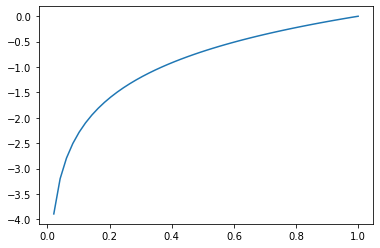

In [40]:
import matplotlib.pyplot as plt

x = np.linspace(0,1)
plt.plot(x,np.log(x))

# 그림을 살펴보면, 정답에 해당하는 출력의 값이 작아질수록 그 값은 커짐을 알 수 있다. 

In [41]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

# 아주 작은 값에 해당하는 delta를 더해주었다.
# np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산이 진행되지 않는 것을 방지하는 것이다. 

In [42]:
cross_entropy_error(np.array(y1), np.array(t))

0.510825457099338

In [43]:
cross_entropy_error(np.array(y2), np.array(t))

2.302584092994546

결과를 보면 확인할 수 있듯, 

자연로그의 특징에 의해 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 된다. 

따라서 정답일 때의 출력이 작아질수록 오차는 커진다. 

---

> ### 미니배치 학습

훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해보자

데이터 하나에 대한 손실 함수를 N개의 데이터로 확장, 마지막에 N으로 나누어 정규화, N으로 나눔으로써 평균 손실 함수를 구하는 것

이렇게 평균을 구해 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있다. 

하지만, 빅데이터 수준이 되면 그 수는 수백만에서 수천만도 넘는 거대한 값이 되기도 한다. 

따라서 이 많은 데이터를 일일이 손실 함수를 계산하는 것은 현실적이지 않으며, 이런 경우 데이터 일부를 추려 전체의 근사치로 이용할 수 있다.

- 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행한다. 

- 이 일부를 미니배치라 한다. 
  - 가령, 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 사용하여 학습하는 것, 이러한 학습 방법을 미니배치 학습이라 한다. 

In [44]:
# 훈련 데이터에서 지정한 수의 데이터를 무작위로 골라내는 코드를 작성해보자
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(X_train, t_train), (x_train, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0] # 입력 데이터 수
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 입력 데이터 수 60,000개 중에서 10개만 뽑는 것
# np.random.choice(a,b) => a중에서 b개만 randomly 뽑는 것
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

- 이제 이 무작위로 선택한 index를 통해 미니배치를 뽑아내면 된다. 
- 무작위 index는 아래와 같다

In [45]:
print(x_batch)
print(t_batch)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


> ### 배치용 교차 엔트로피 오차 구현하기

    미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차를 구현해보자

In [46]:
def cross_entropy_error(y,t):
    # 이때 y는 신경망의 출력, t는 정답레이블이다.
    # y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우엔 reshape 함수로 데이터의 형상을 바꿔준다
    # 그리고 배치 크기고 나눠 정규화하고, 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.
    if y.ndim == 1 :
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7)) / batch_size

- 정답 레이블이 원-핫 인코딩이 아니라 '2'나'7'등의 숫자 레이블로 주어졌을 때의 교차 엔트로피는 다음과 같이 구할 수 있다. 

In [47]:
def cross_entropy_error(y,t):
    if y.ndim==1 : 
        t = t.reshape(1,t.size)
        y = t.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size),t] + 1e-7)) / batch_size

이 구현에서는 원핫인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다. 다시 말하면 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다. 

그래서 원-핫 인코딩 시와 레이블 표현시의 교차엔르로피를 통한 손실함수 수식 값이 달라진다. 

----

> 0708 ~

- 왜 손실 함수를 설정하는가?


가령 여기에 가상의 신경망이 있고 그 신경망의 어느 한 가중치 매개변수에 주목한다 해보자. 이때 그 가중치 매개변수의 손실 함수의 미분이란 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나라는 의미이다. 만약 이 미분 값이 음수면 그 가중치 매개변수르르 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 그러나 미분 값으 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않는다. 그래서 가중치 매개변수의 갱신은 거기서 멈춘다.

정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다. 

정확도는 매개변수의 미세한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다. 

기울기가 0이 되지 않는 덕분에 신경망에 올바르게 학습할 수 있다. 

---

미분은 특정 순간의 변화량을 뜻한다. 

그래서 예를 들어 10분이라는 시간을 가능한 한 줄여 한 순간의 변화량, 즉 어느 순간의 속도를 얻는 것이다. 

x의 작은 변화가 함수 f(x)를 얼마나 변화시키느냐를 의미.

In [48]:
def numerical_diff(f,x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h) / (2*h))

- 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다. 

In [49]:
def numerical_gradient(f,x) :
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같지만 원소는 모두 0인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / 2*h
        x[idx] = tmp_val # 값 복원
        
    return grad

- (3,4)의 기울기는 (6,8)이다.
- 그런데 이 기울기라는 게 의미하는 게 뭘까?
  - 129p의 그림 참고(기울기의 결과에 마이너스를 붙인 벡터를 그린 것)
- 기울기 그림은 129p의 그림처럼 방향을 가진 벡터로 그려진다. 
- 기울기는 함수의 가장 낮은 장소(최솟값)를 가리키는 것 같다. 
- 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐을 알 수 있다. 
- 해당 그림에서 기울기는 가장 낮은 장소를 가리키지만 실제는 반드시 그렇다고는 할 수 없다
- 사실 기울기는 각 지점에서 낮아지는 방향을 가리킨다. 
- ### 더 정확히 말하면 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

---

각 지점에서 함수의 값을 낮추는 (~이때 함수는 손실 함수~) 방안을 제시하는 지표가 기울기라는 것이다. 

그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다. 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다. 

기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다. 

그래서 최솟값이 되는 장소를 찾는 문제(아니면 가능한 한 작은 값이 되는 장소를 찾는 문제)에서는 기울기 정보를 단서로 나아갈 방향을 정해야 한다. 

따라서 ### 경사법 ###이 등장한다

경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 

그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 

이렇게 해서 함수의 값을 점차 줄이는 것이 경사법이다. 

(특히 신경망 학습에는 경사법을 많이 사용한다)

- 신경망 학습에서 각 변수를 갱신하는 양을 나타내는 $\eta$를 학습률이라 한다.

- 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률이다.

- 또한 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 하는데, 일반적으로 이 값이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없다. 

신경망 학습에서는 보통 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다. 

In [50]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
        
    return x

인수 f는 최적화하려는 함수, init_x는 초깃값, lr은 학습률, step_num은 경사법에 따른 반복 횟수를 의미

In [51]:
# 문제 : 경사법으로 f(xo,x1) = x0^2 + x1^2의 최솟값을 구하라
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num=100)

array([-2.9999994,  3.9999992])

- 학습률이 너무 크거나 작으면 함수값이 큰 값으로 발산하거나 혹은 거의 갱신되지 않을 채 끝나버린다. 

- 적절한 학습률 설정이 중요한 이유를 알 수 있다. 

---

> 0711~

신경망 학습에서의 기울기, 즉 가중치 매개변수에 대한 손실 함수의 기울기를 의미함

이때 손실함수를 각 매개변수에 대해 편미분한 것들은 이를테면 $w_1$을 조금 변경했을 때 손실 함수 L이 얼마나 변화하느냐를 나타낸다.

여기서 중요한 점은 $\frac{\partial L}{\partial W}$의 형상이 $W$와 같다는 것이다. 

- 간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드를 구현해보자

In [52]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        
    def predict(self,x): # 입력 데이터 x와 가중치 매개변수 W의 행렬곱 계싼
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

simpleNet 클래스는 형상이 2x3인 가중치 매개변수 하나를 인스턴스 변수로 갖는다. 

메서드는 2개(predict, loss)인데 예측을 수행하는 것과 손실 함수의 값을 구하는 메서드가 있다.

(클래스 안에서의 함수를 메서드라 부른다. )

여기에서 인수 x는 입력 데이터, t는 정답 레이블을 의미한다. 

In [53]:
net = simpleNet()
print(net.W)
# 정규분포로 randomly 추출하기 때문에 실행시마다 상이한 결과값이 도출됨을 알 수 있다. 

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p) # 최댓값의 인덱스

t = np.array([0,0,1]) # 정답 레이블
net.loss(x,t) # 손실 함수의 값 도출

[[-1.95126913  0.84464907  0.86704898]
 [-0.90022306 -0.62969364  0.5790269 ]]
[-1.98096223 -0.05993483  1.0413536 ]


0.32290245434682585

- 기울기를 구해보자
  - numericla_gradient(f,x)를 써서 구한다. 

In [54]:
def f(W):
    return net.loss(x, t)
# 여기에서 정의한 f(W) 함수의 인수 W는 더미로 만든 것이다. 
# numerical_gradient(f,x) 내부에서 f(x)를 실행하는데, 그와의 일관성을 위해 f(W)를 정의한 것이다. 


dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.02115151  0.14442184 -0.16557335]
 [ 0.03172726  0.21663277 -0.24836003]]


numerical_gradient(f,x)의 인수 f는 함수, x는 함수 f의 인수이다. 그래서 여기에서는 net.W를 인수로 받아 손실 함수를 계산하는 새로운 함수 f를 정의한다. 

그리고 이 새로 정의한 함수를 numericla_gradient(f,x)에 넘긴다. 



---

> 간단한 함수라면 새 함수를 정의할 때 람다를 사용하면 더 용이하게 사용할 수 있다. 

In [55]:
f = lambda w : net.loss(x,t)
dW = numerical_gradient(f, net.W)

In [56]:
(lambda x : x+2)(1)

3

---

> ### 학습 알고리즘 구현하기

신경망 학습의 절차는 다음과 같다

전제 > 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.

1. 미니배치
  - 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다. 
  
2. 기울기 산출
  - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
  
3. 매개변수 갱신
  - 가중치 매개변수를 기울기 방향으로 `아주 조금` 갱신한다. 
  
4. 반복
  - 1~3단계를 반복한다.

- 이것이 신경망 학습이 이뤄지는 순서이다. 이는 경사 하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 미니배치로 무작위 선정하기 때문에 확률적(미니배치라는 특성 때문에)경사 하강법이라고 부른다. 

---

- 실제로 손글씨 숫자를 학습하는 신경망을 구현해보자
- 여기에서는 2층 신경망(은닉층이 1개인 네트워크)을 대상으로 MNIST 데이터셋을 사용하여 학습을 수행한다. 

In [57]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
        # __init__메서드 : 클래스를 초기화 한다.
        # 초기화 메서드인 __init__메서드는 TwoLayerNet을 생성할 때 불리는 메서드임
        # 즉 객체가 생성될 때만 불려지는 메서드이다. 
        # 은닉층의 개수인 hidden_size는 적당한 값을 설정한다.
        # 이 초기화 메서드 __init__에서는 가중치 매개변수도 초기화한다. (변수 params를 의미함 )
        # 가중치 매개변수의 초깃값을 무엇으로 설정하냐가 신경망 학습의 성공을 좌우하기도 한다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화 수행
        # 인수 => 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수
        # 이때 TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 가짐.
        # params 변수에는 가중치 매개변수가 저장되는데, 예를 들어 1번째 층의 가중치 매개변수는 params['W1']키에 넘파이 배열로 저장된다. 
        # 마찬가지로 1번째 층의 편향은 params['b1']로 접근한다. 
        # 즉, params 변수에는 이 신경망에 필요한 매개변수가 모두 저장된다. 
        # 그리고 params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용된다. 
        # 참고로 예측 처리는 다음과 같이 실행할 수 있다. 
        # x = np.random.rand(100,784) # 더미 입력 데이터(100장 분량)
        # y = net.predict(x)
        # 이때 net은 클래스 TwoLayerNet의 객체임 (net = TwoLayerNet() like this way)
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x): # 이때 인수 x는 입력 이밈지 데이터를 의미한다. 
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    # 손실 함수의 값을 구하는 메서드이며, 해당 메서드는 predict()의 결과와 정답 레이블을 바탕으로 교차 엔트로피 오차를 구하도록 구현했다.
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    # 각 매개변수의 기울기를 계산한다. 
    # 수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기를 계산한다. 
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        # grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다. 
        # 예를 들어 다음과 같이 numerical_gradient() 메서드를 사용해 기울기를 계싼하면 grads 변수에 기울기 정보가 저장된다.
        # 다음과 같이 사용할 수 있다. 
        # x = np.random.rand(100,784) # 더미 입력 데이터(100장 분량)
        # t = np.random.rand(100,10) # 더미 정답 레이블(100장 분량)
        # grads = net.numerical_gradient(x, t) # 기울기 계산
        # 이때 net은 해당 클래스의 객체 이름임
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

---

> 미니배치 학습 구현하기

신경망 학습 구현에는 앞에서 설명한 미니배치 학습을 활용한다.

미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다. 

train acc, test acc | 0.09741666666666667, 0.0982
train acc, test acc | 0.79715, 0.8016
train acc, test acc | 0.8785666666666667, 0.8815
train acc, test acc | 0.8977833333333334, 0.8994
train acc, test acc | 0.9075166666666666, 0.9107
train acc, test acc | 0.9134833333333333, 0.9158
train acc, test acc | 0.9190666666666667, 0.9208
train acc, test acc | 0.92385, 0.9255
train acc, test acc | 0.9273, 0.928
train acc, test acc | 0.9302166666666667, 0.9325
train acc, test acc | 0.9345, 0.936
train acc, test acc | 0.9371166666666667, 0.9383
train acc, test acc | 0.9394166666666667, 0.9398
train acc, test acc | 0.9415666666666667, 0.9418
train acc, test acc | 0.9431666666666667, 0.942
train acc, test acc | 0.94515, 0.9444
train acc, test acc | 0.9472, 0.9463


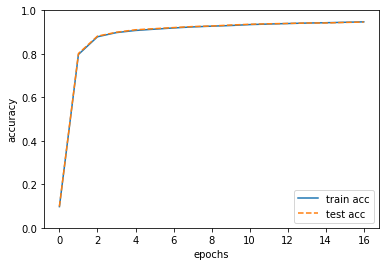

In [58]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
# 미니배치 크기를 100으로 한다. 
# 즉, 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이블 데이터)를 추려낸다.
# 그리고 그 100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다. 
# 경사법에 의한 갱신 횟수(반복 횟수) 10,000번으로 설정하고, 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고 그 값을 배열에 추가한다. 
# 이 손실 함수의 값이 변화하는 추이를 그래프로 나타내면
# 학습 횟수가 늘어가면서 손실 함수의 값이 줄어듦을 알 수 있다. 
# 이는 학습이 잘 되고 있다는 뜻으로, 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미한다.
# 다시 말해, 데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가서고 있는 것

learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        
        
#############################################################################################
        
        
# 그래프 그리기

import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


해당 그림에서는 1에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고, 그 결과를 기록한다. 

정확도를 1에폭마다 계산하는 이유는 for문 안에서 매번 계산하기에는 시간이 오래 걸리고, 또 그렇게가지 자주 기록할 필요도 없기 때문이다. 

그래프에서 볼 수 있듯, 에폭이 진행될수록 즉, 학습이 진행될수록 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있다. 

또, 두 정확도에는 차이가 없음을 알 수 있다. 다시 말해 이번 학습에서는 오버피팅이 일어나지 않았음을 알 수 있다. 

> 만약 오버피팅이 일어난다면 이 모습은 어떻게 달라질까?

    훈련이란 훈련데이터에 대한 정확도를 높이는 방향으로 학습하는 것이니 그 정확도는 에폭을 반복할 수록 높아진다. 
    반면 훈련 데이터에 지나치게 적응하면, 즉 오버피팅되면 훈련 데이터와는 다른 데이터를 보면 잘못된 판단을 하기 시작한다. 
    어느 순간부터 시험 데이터에 대한 정확도가 점차 떨어지게 된다는 것이다. 
    
    **이 순간이 오버피팅이 시작되는 순간이다. 이 순간을 포착해 학습을 중단하면 오버피팅을 효과적으로 예방할 수 있다. 이 기법을 조기종료라고 하며 가중치 감소, 드롭 아웃이 오버피팅의 대표적인 예방법이라고 할 수 있다**

> ### Conclusion

    신경망 학습에 대해 배웠다.
    가장 먼저 신경망이 학습을 수행할 수 있도록 손실 함수라는 지표를 도입했다. 
    이 손실 함수를 기준으로 그 값이 가장 작아지는 가중치 매개변수 값을 찾아내는 것이 신경망 학습의 목표이다.
    또, 가능한 한 작은 손실 함수의 값을 찾는 수법으로 경사법을 소개했다. 
    경사법은 함수의 기울기를 이용하는 방법이다. 
    
    

---

### 오차역전파법

종전에 설명했던 신경망의 가중치 매개변수의 기울기는 수치 미분을 사용해 구했다.

수치 미분은 단순하고 구현하기도 쉽지만 계산 시간이 오래 걸린다는 게 단점이다. 

이번 장에서는 가중치 매개변수의 기울기를 효율적으로 계산하는 오차역전파법을 배워본다

> 계산 그래프를 통해 오차역전파법에 대해 알아보자

계산 그래프는 계산 과정을 그래프로 나타낸 것이다. 이때, 그래프는 복수의 노드와 에지로 표현된다. 

노드 사이의 직선을 에지라고 한다. 

----

> 0718~

계산 그래프를 이해해보자

계산 그래프는 계산 과정을 노드와 화살표로 표현한다. 노드는 원으로 표기하고 원 안에 연산 내용을 적는다. 또, 계산 결과를 화살표 위에 적어 각 노드의 계산 결과가 왼쪽에서 오른쪽으로 전해지게 한다. 

1. 계산 그래프를 구성한다. 
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다. 
  - 이때, 계산을 왼쪽에서 오른쪽으로 진행하는 단계를 순전파라고 한다. 
  - 순전파는 계산 그래프의 출발점부터 종착점으로의 전파이다. 
  - 반대로 오른쪽에서 왼쪽으로 진행하는 역전파도 있을 것이다. 

계산 그래프의 특징은 `국소적 계산`을 전파함으로써 최종 결과를 얻는다는 점에 있다. 

국소적 계산은 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 것이다. 

즉, 각 노드는 자신과 관련한 계산외에는 아무것도 신경 쓸 게 없다. 

-> 이처럼 계산 그래프는 국소적 계산에 집중한다. 전체 계산이 제아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 국소적 계산이다. 국소적인 계산은 단순하지만, 그 결과를 전달함으로써 전체를 구성하는 복잡한 계산을 해낼 수 있다. 

-> 또한 중간 계산 결과를 모두 보관할 수 있다. 

-> ***역전파를 통해 미분을 효율적으로 계산할 수 있다.***

역전파는 국소적인 미분을 순방향과는 반대인 오른쪽에서 왼쪽으로 전달한다. 

또한 이 국소적 미분을 전달하는 원리는 연쇄법칙에 따른 것이다. 

역전파의 계산 절차는 신호 E에 국소적 미분, $\frac{\partial y }{\partial x}$을 곱한 후 다음 노드로 전달하는 것이다. 

-> 즉, $E\frac{\partial y }{\partial x}$를 다음 노드로 전달한다. 여기에서 국소적 미분은 순전파 때의 y=f(x) 계산의 미분을 구한다는 것이며, 이는 x에 대한 y의 미분을 구한다는 뜻이다.

- 이것이 역전파의 계산 순서인데, 이러한 방식을 따르면 목표로 하는 미분 값을 효율적으로 구할 수 있다는 것이 이 전파의 핵심이다. 왜 그런 일이 가능한가는 연쇄법칙의 원리로 설명할 수 있다. 연쇄법칙에 대해 알아보자
- 연쇄법칙은 합성 함수의 미분에 대한 성질이며, 다음과 같이 정의된다. 
  - 합성 함수의 미분은 함성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다. 

- $z = t^2$
- $t = x+y$
- 즉, $z = (x+y)^2$

- 이때, z를 x에 대해 미분해보자
- $\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x}$
- $\frac{\partial z}{\partial t} = 2t$
- $\frac{\partial t}{\partial x} = 1$

- 따라서 $\frac{\partial z}{\partial x}$는 $2t = 2(x+y)$임을 알 수 있다. 

> #### 계산 그래프의 역전파가 연쇄법칙에 따라 진행된다!!

----

#### 덧셈 노드의 역전파

덧셈 노드의 역전파때는 상류에서 전해진 미분에 1을 곱하여 하류로 흘린다. 따라서 입력된 값을 그대로 다음 노드로 보내게 되는 것이다. 

(최종 출력으로 가는 계산의 중간에 덧셈 노드가 존재한다. 역전파에서는 국소적 미분이 가장 오른쪽의 출력에서 시작하여 노드를 타고 역방향으로 전파된다. )

덧셈 노드 역전파는 입력 신호를 다음 노드로 출력할 뿐이므로 입력된 값을 그대로 다음 노드로 전달하는 것이 핵심이다.

----

#### 곱셈 노드의 역전파

곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호들(위치적으론 왼쪽에 위치해있던 신호들)을 서로 바꾼 값을 곱해서 하류로 보낸다. 

서로 바꾼 값이란 순전파 때 x였다면 역전파에서는 y, 순전파 때 y였다면 역전파에서는 x로 바꾼다는 의미이다. 

----

> 덧셈의 역전파에서는 상류의 값(위치상 오른쪽에 위치해있던 값)을 그대로 흘려보내서 순방향 입력 신호의 값을 필요하지 않았지만, 곱셈의 역전파는 순방향 입력 신호의 값이 필요하다. 그래서 곱셈 노드를 구현할 때는 순전파의 입력 신호를 변수에 저장해둔다. 

---

> #### 사과쇼핑의 예를 파이썬으로 구현해보자

> 계산 그래프의 곱셈 노드를 'MulLayer', 덧셈 노드를 'AddLayer'라는 이름으로 구현한다. 

1) 곱셈 계층

In [59]:
class MulLayer:
    def __init__(self): # 인스턴스 변수인 x와 y를 초기화한다. 이 두 변수는 순전파 시의 입력 값을 유지하기 위해서 사용한다. 
        self.x = None 
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout): # 이때 dout는 상류에서 넘어온 미분값. 
        # 상류에서 넘어온 미분인 dout에 순전파 때의 값을 서로 바꿔 곱한 후 하류로 흘린다. 
        dx = dout * self.y 
        dy = dout * self.x

        return dx, dy


class AddLayer:
    
    # 덧셈 계층에서는 초기화가 필요 없으니 __init__()에서는 아무 일도 하지 않는다. 
    # 곱셈 계층에서는 초기화가 필요했었음. . .
    # 내 생각인데
    # 곰셈 계층의 역전파에서는 입력값이 지정이 돼있어야 역전파의 진행이 가능했었음
    # 그런데 덧셈 계층의 역전파에서는 그냥 입력값을 그대로 흘려보내주는 역할만 하기 때문에
    # 덧셈 계층의 역전파에서는 입력값이 따로 필요 없음
    # 즉, 초기화라는 단어의 의미는 우리가 흔히 아는 reset의 의미보다는
    # 값을 지정해준다? 정도로 기억하면 될 것 같음
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
    # 즉, backward()에서는 상류에서 내려온 미분을 그대로 하류로 흘릴뿐이다. 
        return dx, dy

In [60]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# 개당 가격이 100원인 사과 2개의 가격에 소비세 1.1을 곱한 결과는?
# 220임을 알 수 있다. 
print(price)

220.00000000000003


In [61]:
# 위치상 가장 오른쪽에 위치해있는 입력값
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


- backward() 호출 순서는 forward() 때와는 반대이다. 또, backward()가 받는 인수는 순전파의 출력에 대한 미분임에 주의해야 한다. 가령 mul_apple_layer라는 곱셈 계층은 순전파 때는 apple_price를 출력하지만, 역전파 때는 apple_price의 미분 값인 dapple_price를 인수로 받는다. 

---

> ### 활성화 함수 계층 구현하기

    계산 그래프를 신경망에 적용해보자.
    여기에서는 신경망을 구성하는 층 각각을 클래스 하나로 구현한다. 
    우선은 활성화 함수인 ReLU와 Sigmoid 계층을 구현하자. 

> #### ReLU 계층?

In [62]:
class Relu:
    def __init__(self):
        # mask는 True/False로 구성된 넘파이 배열로, 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True, 그 외는 Flase로 유지한다.
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

> 순전파 때의 입력 값이 0 이하면 역전파 때의 값은 0이 돼야 한다. 그래서 역전파 때는 순전파 때 만들어둔 mask를 써서 mask의 원소가 True인 곳(즉, 입력 x값이 0이하인 곳)에는 상류에서 전파된 dout을 0으로 만듦

> ReLU 계층은 전기 회로의 스위치에 비유할 수 있다. 순전파 때 전류가 흐르고 있으면 스위치를 ON으로 하고, 흐르지 않으면 off한다. 역전파 때는 스위치가 ON이라면 전류가 그대로 흐르고(1을 곱하기 때문에) OFF면 더 이상 흐르지 않는다. 

----

> ## Sigmoid 계층

다음은 시그모이드 함수식이다. 

### $y = \frac{1}{1 + exp(-x)}$

위의 시그모이드 함수식도 국소적 계산의 전파로서 이해할 수 있음

즉, 역전파도 행할 수 있다는 것이고, 오른쪽에서 왼쪽으로 한 단계씩 짚어보자

$\to$ 역전파의 과정을 살펴보면, 역전파의 최종 출력인 $\frac{\partial L}{\partial y}y^2exp(-x)$ 를 순전파의 입력 x와 출력 y만으로 계산할 수 있음을 알 수 있다.

$\to$ 또한 $\frac{\partial L}{\partial y}y^2exp(-x)$를 정리해서 써보면 Sigmoid 계층의 역전파는 순전파의 출력 y만으로 계산할 수 있다. 

In [63]:
class Sigmoid:
    # 순전파의 출력을 인스턴스 변수 out에 보관했다가, 역전파 때 그 계산을 사용한다.
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

했을 때 다음에 할 수 있는 말에 대해 고를 수 있는 건 다름 아닌 바로 그 다음 단계로 나아갈 수 있는 것이다. 지금은 이 셀들이 진행중인 것이고 앞으로 다가가는 approximation

---

> ### 0726~

### Affine/Softmax 계층 구현하기

- 행렬의 곱 계산은 대응하는 차원의 원소 수를 일치시키는 게 핵심이다. 
- 신경망의 순전파 때 수행하는 행렬의 곱은 기하학에서는 어파인 변환이라고 한다.
- 따라서 해당 교재에서는 어파인 변환을 수행하는 처리를 Affine 계층이라는 이름으로 구현한다.

- 지금까지의 계산 그래프는 노드 사이에 스칼라값이 흘렀는 데 반해, 이 예에서는 행렬이 흐르고 있는 것이다.
- 행렬 곱(dot 노드)의 역전파는 행렬의 대응하는 차원의 원소 수가 일치하도록 곱을 조립하여 구할 수 있다.

> ### 배치용 Affine 계층

지금까지 설명한 Affine 계층은 입력 데이터로 X 하나만을 고려한 것이다. 이번엔 데이터 N개를 묶어 순전파하는 경우, 즉 배치용 Affine 계층을 생각해보자

(이떄 묶은 데이터를 배치라고 부른다.)

***역전파 때는 행렬의 형상에 주의하여 곱을 조정한다***

순전파의 편향 덧셈은 각각의 데이터에 더해진다.

그래서 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다.
 
편향의 역전파는 그 두 데이터에 대한 미분을 데이터마다 더해서 구한다.  

In [69]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

### Softmax-with-loss 계층

출력층에서 사용하는 소프트맥스 함수에 관해 알아보자

소프트맥스 함수는 입력 값을 정규화하여 출력한다. 

입력이미지가 Affine 계층과 ReLU 계층을 통과하며 변환되고, 마지막 Softmax 계층에 의해서 10개의 입력이 정규화되는 것

주목할 것은 역전파의 결과이다. Softmax 계층의 역전파는 꽤 말끔한 결과를 내놓는다.

Softmax 계층의 출력과 정답 레이블의 차분을 전달한다. 

신경망의 역전파에서는 이 차이인 오차가 앞 계층에 전해지는 것이다. 

이는 신경망 학습의 중요한 성질이다. 

In [71]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx



또, 역전파때는 전파하는 값을 배치의 수로 나눠서 데이터 1개당 오차를 앞 계층으로 전파하는 점에 주의해야 한다. 

---

> 지금까지 구현한 계층을 조합해서 신경망을 구축해보자

> 신경망 학습의 전체 그림

전제) 신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다. 

1단계) 미니배치
- 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.

2단계) 기울기 산출
- 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다. 

3단계) 매개변수 갱신
- 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다. 

4단계) 반복
- 앞의 1~3단계를 반복한다. 

> 이때 오차역전파법이 등장하는 단계는 두 번째인 기울기 산출이다. 

> 앞 장에서는 이 기울기를 구하기 위해서 수치 미분을 사용했던 것이다.  그런데 수치 미분은 구현하기는 쉽지만 계산이 오래걸렸다.  오차역전파법을 이용하면 느린 수치 미분과 달리 기울기를 효율적이고 빠르게 구할 수 있다. 